In [199]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import math
%matplotlib inline

In [200]:
def noise_generator(samples, mu=0.0, beta=0.1):
    noise = np.random.normal(mu, beta, samples)
    return noise

def uniform_variable_generator(samples):
    random_ = rand(samples)
    return random_

class gaussian_basis:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def func_val(self, x):
        y = np.exp(-0.5*((x-self.mu)/self.sigma)**2)
        return y

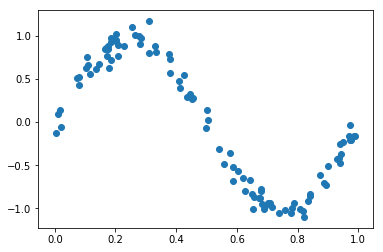

In [201]:
samples = 100

x_rand = uniform_variable_generator(samples)
y_noised = np.sin(2 * np.pi * x_rand) + noise_generator(samples)

plt.scatter(x_rand, y_noised)
plt.show()

In [202]:
mu_basis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sigma_basis = 0.1

basis = []
for i, val in enumerate(mu_basis):
    base = gaussian_basis(val, sigma_basis)
    basis.append(base)

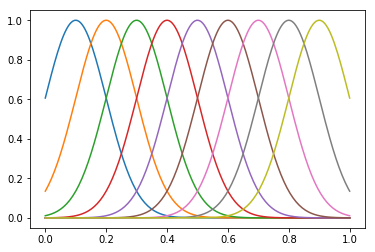

In [203]:
for i, base in enumerate(basis):
    x = np.linspace(0, 1, 200)
    y = basis[i].func_val(x)
    plt.plot(x, y)
plt.show()

In [204]:
# Step1: design matrixの生成 N*M
samples = 25
basis_dim = 10
design_matrix = np.zeros((samples, basis_num))

x_rand = uniform_variable_generator(samples)
y_noised = np.sin(2 * np.pi * x_rand) + noise_generator(samples)
mu_basis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sigma_basis = 0.1
basis = []
for i, val in enumerate(mu_basis):
    base = gaussian_basis(val, sigma_basis)
    basis.append(base)

for i in range(samples):
    for j in range(basis_dim):
        if j == 0:
            design_matrix[i,j] = x_rand[i]
        else:
            design_matrix[i,j] = basis[j-1].func_val(x_rand[i])

In [205]:
# Step2: Sigma matrix(inversed)の生成
alpha = 2
beta = 25

I = np.identity(basis_dim)
S_n = alpha * I + beta * np.dot(design_matrix.T, design_matrix)

In [206]:
# Step3: 平均ベクトルの生成
m_n = beta * np.dot(np.dot(np.linalg.inv(S_n), design_matrix.T), y_noised)

In [207]:
# Step4: phi-vectorの生成
# xを入力として、basis_dimと同次元の基底ベクトルを返す
def basis_vector(x, basis_dim):
    phi = np.zeros(basis_dim)
    for i in range(basis_dim):
        if (i == 0):
            phi[i] = x
        else:
            phi[i] = basis[i-1].func_val(x)
    return phi

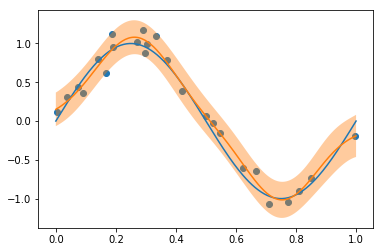

In [219]:
x = np.linspace(0, 1, 200)

y_list = []
sigma_list = []
for i in range(x.shape[0]):
    y_list.append(np.dot(m_n.T, basis_vector(x[i], basis_dim)))
    sigma = math.sqrt(1/beta + np.dot(np.dot(basis_vector(x[i], basis_dim).T, np.linalg.inv(S_n)), basis_vector(x[i], basis_dim)))
    sigma_list.append(sigma)

plt.plot(x, np.sin(2*np.pi*x))
plt.scatter(x_rand, y_noised)
plt.plot(x, y_list)
plt.fill_between(x,np.array(y_list) - np.array(sigma_list),np.array(y_list) + np.array(sigma_list),alpha=0.4)
plt.show()